# Step #1 Importing Data

In [175]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
df = pd.read_excel(r'//content/Health Data Breaches.xlsx')

# Step #2 Exploring Data

In [111]:
df.head(5)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,2009,2010,2011,2012,2013,2014,2015,2016,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Advantage Consolidated LLC,OR,Healthcare Provider,151626,2015-03-18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Hacking/IT Incident,Other,No,NaN
1,"Doctors First Choice Billings, Inc.",FL,Business Associate,1831,2014-06-12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Hacking/IT Incident,Other,Yes,\N
2,"Goshen Health System, Inc.",IN,Healthcare Provider,660,2012-02-14,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Hacking/IT Incident,Other,No,Computer servers of Goshen Health System's bus...
3,Group Life Hospital and Medical Program,CT,Health Plan,3000,2016-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No,NaN
4,"Health Incent, LLC",TN,Healthcare Provider,1100,2016-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No,NaN


In [112]:
df.tail(5)

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,2009,2010,2011,2012,2013,2014,2015,2016,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
1695,M&C Children's Clinic PA,TX,NaN,NaN,2013-03-19,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,No,"On March 19, 2013, the covered entity (CE), M ..."
1696,Memorial Health Systems,CO,NaN,NaN,2011-07-15,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1697,Northwestern Memorial HealthCare,IL,NaN,NaN,2014-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1698,St. Joseph Health System,CA,NaN,NaN,2012-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1699,"StandfordSchoolMedicine& LP Children Hosp, Pri...",CA,NaN,NaN,2013-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


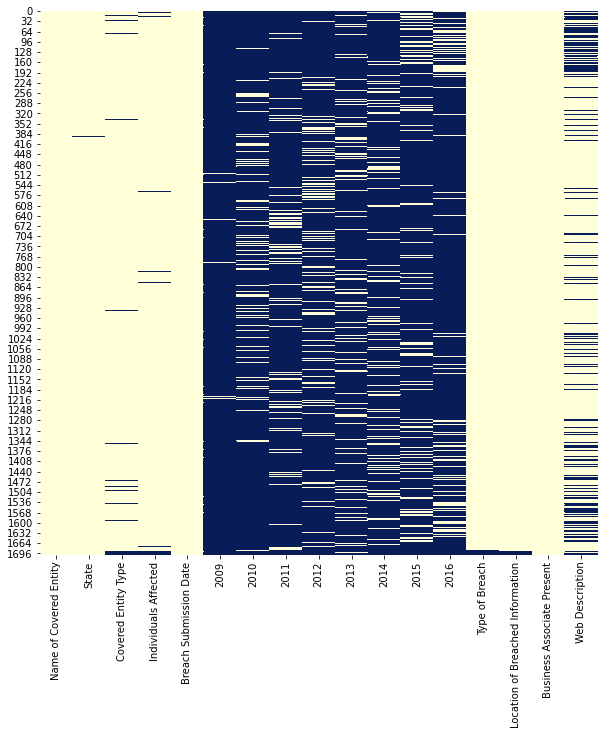

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu')

In [114]:
df=df.drop(['Web Description','Name of Covered Entity'], axis = 1)

###        *State with highest number of Breaches*





In [115]:
df['State'].value_counts().iloc[:10]

CA    200
TX    140
FL    114
NY    104
IL     93
PA     60
IN     57
OH     56
GA     50
NC     44
Name: State, dtype: int64

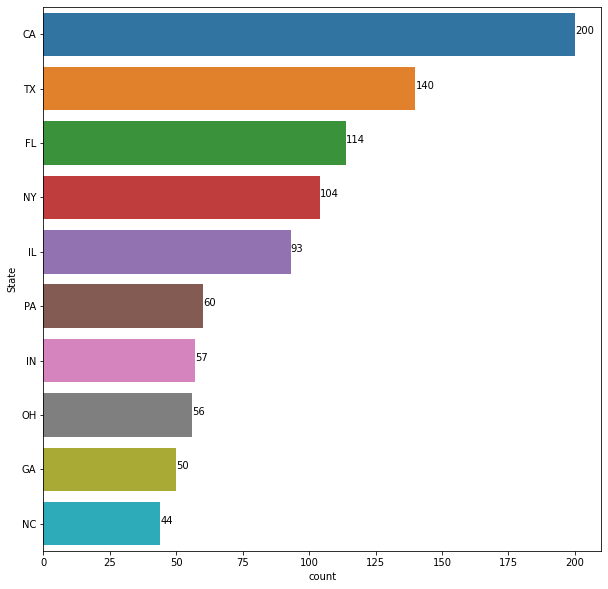

In [116]:
plt.figure(figsize=(10,10))
sns.countplot(y='State',data=df,order=df['State'].value_counts().iloc[:10].index)
for index, value in enumerate(df['State'].value_counts().iloc[:10]):
    plt.text(value, index, str(value))

### *Entity type has highest number of Breaches*

In [117]:
df["Covered Entity Type"].value_counts()

Healthcare Provider          1173
Business Associate            274
Health Plan                   207
Healthcare Clearing House       4
Name: Covered Entity Type, dtype: int64

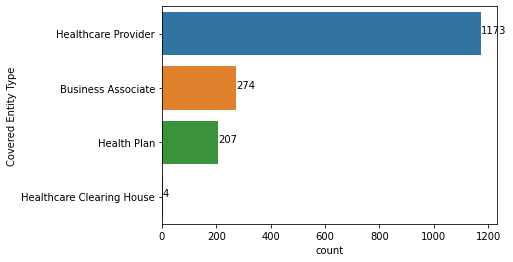

In [118]:
sns.countplot(y='Covered Entity Type',data=df)
for index, value in enumerate(df['Covered Entity Type'].value_counts()):
    plt.text(value, index, str(value))

### *Most common Type of Breach*

In [119]:
df["Type of Breach"].value_counts().iloc[:10]

Theft                                                  724
Unauthorized Access/Disclosure                         399
Hacking/IT Incident                                    222
Loss                                                   120
Other                                                   77
Improper Disposal                                       51
Theft, Unauthorized Access/Disclosure                   24
Loss, Theft                                             15
Unknown                                                  9
Hacking/IT Incident, Unauthorized Access/Disclosure      8
Name: Type of Breach, dtype: int64

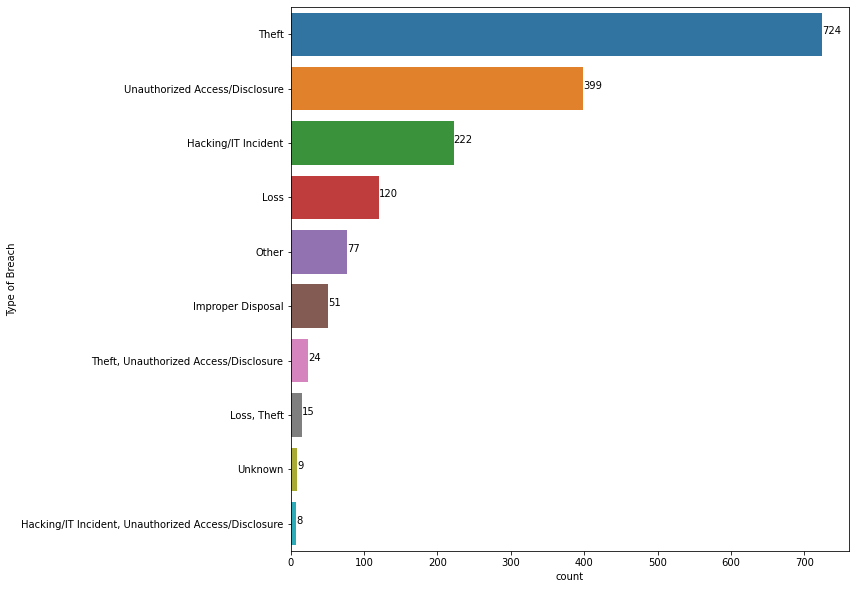

In [120]:
plt.figure(figsize=(10,10)),
sns.countplot(y='Type of Breach',data=df,order=df['Type of Breach'].value_counts().iloc[:10].index)
for index, value in enumerate(df['Type of Breach'].value_counts().iloc[:10]):
    plt.text(value, index, str(value))

### *Most common Location of Breached Information*

In [121]:
df['Location of Breached Information'].value_counts().iloc[:10]

Paper/Films                                 387
Laptop                                      285
Network Server                              225
Other                                       164
Desktop Computer                            134
Email                                       130
Other Portable Electronic Device             94
Electronic Medical Record                    63
Other, Other Portable Electronic Device      45
Laptop, Other Portable Electronic Device     16
Name: Location of Breached Information, dtype: int64

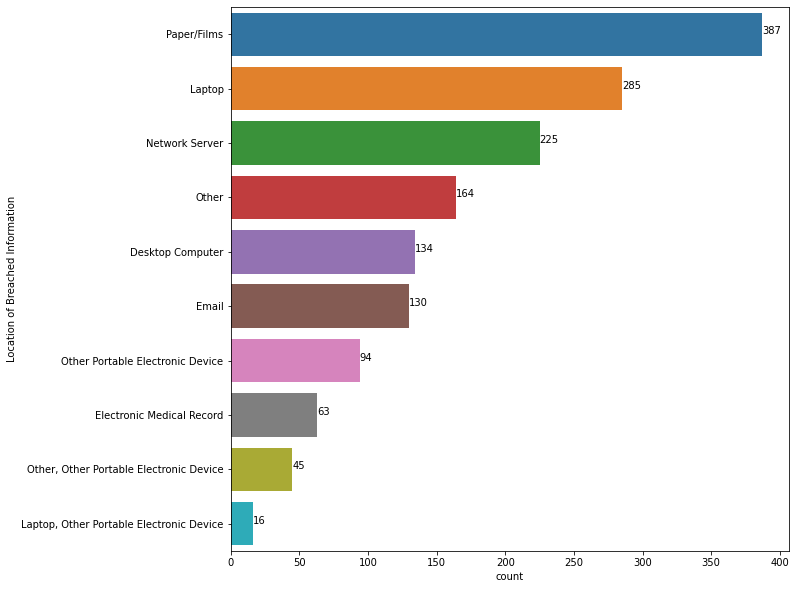

In [122]:
plt.figure(figsize=(10,10))
sns.countplot(y= 'Location of Breached Information', data = df, order = df['Location of Breached Information'].value_counts().iloc[:10].index)
for index, value in enumerate(df['Location of Breached Information'].value_counts().iloc[:10]):
    plt.text(value, index, str(value))


### *Number of Breaches a Business associate is involved*

*   List item
*   List item



In [123]:
df['Covered Entity Type'].value_counts()

Healthcare Provider          1173
Business Associate            274
Health Plan                   207
Healthcare Clearing House       4
Name: Covered Entity Type, dtype: int64

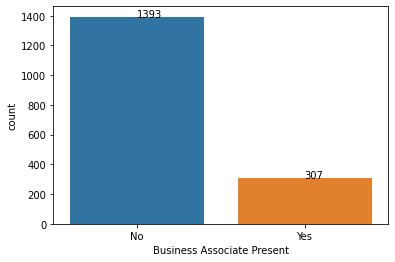

In [124]:
sns.countplot(x="Business Associate Present",data=df)
for index, value in enumerate(df['Business Associate Present'].value_counts()):
    plt.text(index, value, str(value))

### *Presence of Business Associate in Different Entity Types*

<Figure size 720x720 with 0 Axes>

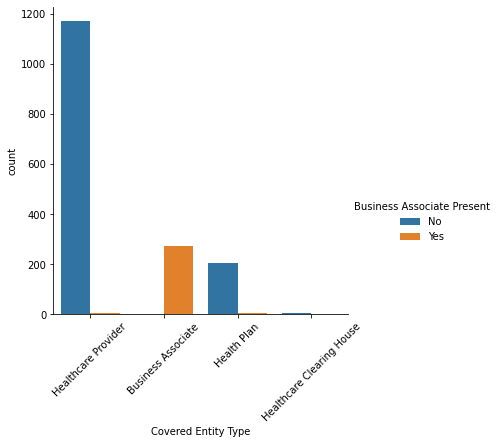

In [125]:
plt.figure(figsize=(10,10))
gph=sns.catplot(x='Covered Entity Type',hue='Business Associate Present',kind='count',data=df)
for axes in gph.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

### *Different Types of Breaches in different Entity Types*

<Figure size 7200x7200 with 0 Axes>

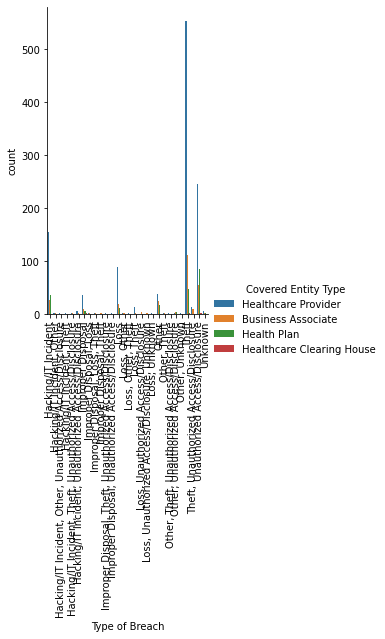

In [126]:
plt.figure(figsize=(100,100))
gph=sns.catplot(x='Type of Breach',hue='Covered Entity Type',kind='count',data=df)
for axes in gph.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Step #3 Preparing The Data

In [127]:
df[df.duplicated(keep=False)]

,State,Covered Entity Type,Individuals Affected,Breach Submission Date,2009,2010,2011,2012,2013,2014,2015,2016,Type of Breach,Location of Breached Information,Business Associate Present
40,MN,Health Plan,1550,2016-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Network Server,No
41,MN,Health Plan,1550,2016-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Network Server,No
585,FL,Healthcare Provider,648,2016-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Theft,Paper/Films,No
586,FL,Healthcare Provider,648,2016-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Theft,Paper/Films,No
659,CA,Business Associate,1474,2010-09-23,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Theft,"Other, Other Portable Electronic Device",Yes
674,CA,Business Associate,1474,2010-09-23,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Theft,"Other, Other Portable Electronic Device",Yes


In [128]:
df=df.drop_duplicates()
df

,State,Covered Entity Type,Individuals Affected,Breach Submission Date,2009,2010,2011,2012,2013,2014,2015,2016,Type of Breach,Location of Breached Information,Business Associate Present
0,OR,Healthcare Provider,151626,2015-03-18,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,Hacking/IT Incident,Other,No
1,FL,Business Associate,1831,2014-06-12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Hacking/IT Incident,Other,Yes
2,IN,Healthcare Provider,660,2012-02-14,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Hacking/IT Incident,Other,No
3,CT,Health Plan,3000,2016-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No
4,TN,Healthcare Provider,1100,2016-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Hacking/IT Incident,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,TX,NaN,NaN,2013-03-19,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,No
1696,CO,NaN,NaN,2011-07-15,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1697,IL,NaN,NaN,2014-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1698,CA,NaN,NaN,2012-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [129]:
df = df.drop(['State','Breach Submission Date','Individuals Affected'], axis = 1)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1699
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Covered Entity Type               1655 non-null   object 
 1   2009                              18 non-null     float64
 2   2010                              197 non-null    float64
 3   2011                              196 non-null    float64
 4   2012                              207 non-null    float64
 5   2013                              273 non-null    float64
 6   2014                              293 non-null    float64
 7   2015                              269 non-null    float64
 8   2016                              239 non-null    float64
 9   Type of Breach                    1683 non-null   object 
 10  Location of Breached Information  1686 non-null   object 
 11  Business Associate Present        1697 non-null   object 
dtypes: flo

In [131]:
cnt = df.describe().loc[['count']]
cnt

,2009,2010,2011,2012,2013,2014,2015,2016
count,18.0,197.0,196.0,207.0,273.0,293.0,269.0,239.0


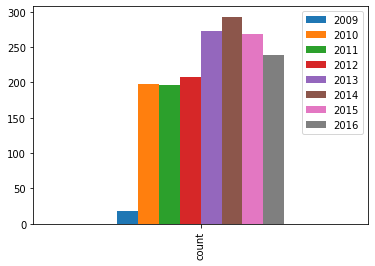

In [132]:
cnt.plot(kind='bar')

### Since categories in columns *'Types of Breach'* and *Location of Breached Information* are huge. So, I merged categories for ease

##### *For column 'Types of Breach' :*

In [133]:
df['Type of Breach'].replace(['Theft','Loss','Other','Loss, Theft','Unknown','Other, Theft','Other, Unknown','Loss, Other','Loss, Unknown','Loss, Other, Theft'],'Loss, Theft, Other, Unknown',inplace=True)
df['Type of Breach'].replace(['Unauthorized Access/Disclosure','Theft, Unauthorized Access/Disclosure','Other, Unauthorized Access/Disclosure','Loss, Unauthorized Access/Disclosure','Other, Theft, Unauthorized Access/Disclosure','Improper Disposal, Unauthorized Access/Disclosure','Improper Disposal, Theft, Unauthorized Access/Disclosure','Loss, Unauthorized Access/Disclosure, Unknown'],'Unauthorized Access/Disclosure, Theft, Other, Loss,Improper Disposal',inplace=True)
df['Type of Breach'].replace(['Hacking/IT Incident','Hacking/IT Incident, Unauthorized Access/Disclosure','Hacking/IT Incident, Theft, Unauthorized Access/Disclosure','Hacking/IT Incident, Other','Hacking/IT Incident, Other, Unauthorized Access/Disclosure','Hacking/IT Incident, Theft'],'Hacking/IT Incident, Unauthorized Access/Disclosure, Theft, Other',inplace=True)
df['Type of Breach'].replace(['Improper Disposal','Improper Disposal, Loss','Improper Disposal, Loss, Theft','Improper Disposal, Theft'],"Improper Disposal, Loss, Theft",inplace=True)

##### *For column 'Location of Breached Information' :*

In [134]:
df['Location of Breached Information'].replace(['Desktop Computer', 'Desktop Computer, Electronic Medical Record', 'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server', 'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other Portable Electronic Device', 'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device', 'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films', 'Desktop Computer, Electronic Medical Record, Email, Network Server', 'Desktop Computer, Electronic Medical Record, Email, Network Server, Paper/Films', 'Desktop Computer, Electronic Medical Record, Laptop', 'Desktop Computer, Electronic Medical Record, Network Server', 'Desktop Computer, Electronic Medical Record, Other', 'Desktop Computer, Email', 'Desktop Computer, Email, Laptop, Network Server', 'Desktop Computer, Email, Laptop, Network Server, Other Portable Electronic Device', 'Desktop Computer, Email, Laptop, Network Server, Other, Other Portable Electronic Device', 'Desktop Computer, Email, Network Server', 'Desktop Computer, Laptop', 'Desktop Computer, Laptop, Network Server', 'Desktop Computer, Laptop, Network Server, Other Portable Electronic Device', 'Desktop Computer, Laptop, Other Portable Electronic Device', 'Desktop Computer, Laptop, Other, Other Portable Electronic Device', 'Desktop Computer, Laptop, Paper/Films', 'Desktop Computer, Network Server', 'Desktop Computer, Network Server, Other, Other Portable Electronic Device', 'Desktop Computer, Network Server, Paper/Films', 'Desktop Computer, Other', 'Desktop Computer, Other Portable Electronic Device', 'Desktop Computer, Other Portable Electronic Device, Paper/Films', 'Desktop Computer, Other, Other Portable Electronic Device', 'Desktop Computer, Other, Other Portable Electronic Device, Paper/Films', 'Desktop Computer, Paper/Films'],'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films',inplace=True)
df['Location of Breached Information'].replace(['Electronic Medical Record', 'Electronic Medical Record, Laptop', 'Electronic Medical Record, Laptop, Network Server, Other, Other Portable Electronic Device', 'Electronic Medical Record, Network Server', 'Electronic Medical Record, Other', 'Electronic Medical Record, Other, Other Portable Electronic Device', 'Electronic Medical Record, Paper/Films'],'Electronic Medical Record, Laptop, Network Server, Other, Other Electronic Portable Device, Paper/Films',inplace=True)
df['Location of Breached Information'].replace(['Email', 'Email, Laptop', 'Email, Laptop, Network Server', 'Email, Laptop, Other Portable Electronic Device', 'Email, Laptop, Paper/Films', 'Email, Network Server', 'Email, Network Server, Other Portable Electronic Device', 'Email, Other', 'Email, Other Portable Electronic Device'],'Email, Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films',inplace=True)
df['Location of Breached Information'].replace(['Laptop', 'Laptop, Network Server', 'Laptop, Other', 'Laptop, Other Portable Electronic Device', 'Laptop, Other Portable Electronic Device, Paper/Films', 'Laptop, Paper/Films'],'Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films',inplace=True)
df['Location of Breached Information'].replace(['Network Server', 'Network Server, Other', 'Network Server, Paper/Films'],'Network Server, Other, Paper/Films',inplace=True)
df['Location of Breached Information'].replace(['Other','Other, Other Portable Electronic Device', 'Other, Paper/Films'],'Other, Other Portable Electronic Device, Paper/Films',inplace=True)
df['Location of Breached Information'].replace(['Other Portable Electronic Device', 'Other Portable Electronic Device, Paper/Films'],'Other Portable Electronic Device, Paper/Films',inplace=True)


### Renaming Label as they are too large

#### Abbrevations


*   Desktop Computer ---> D
* Electronic Medical Record ---> E
* Email ---> e
* Laptop ---> L
* Network Server ---> N
* Other ---> O
* Other Portable Electronic Device ---> o
* Paper/Films ---> P

##### *For column 'Types of Breach' :*

In [135]:
df.replace('Loss, Theft, Other, Unknown','LTOU',inplace=True)
df.replace('Unauthorized Access/Disclosure, Theft, Other, Loss,Improper Disposal','UA/DTOLIU',inplace=True)
df.replace('Hacking/IT Incident, Unauthorized Access/Disclosure, Theft, Other','HUA/DTO',inplace=True)
df.replace('Improper Disposal, Loss, Theft','ILT',inplace=True)

##### *For column 'Location of Breached Information' :*

In [136]:
df.replace('Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films','DEeLNOoP',inplace=True)
df.replace('Electronic Medical Record, Laptop, Network Server, Other, Other Electronic Portable Device, Paper/Films','ELNOoP',inplace=True)
df.replace('Email, Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films','eLNOoP',inplace=True)
df.replace('Laptop, Network Server, Other, Other Portable Electronic Device, Paper/Films','LNOoP',inplace=True)
df.replace('Network Server, Other, Paper/Films','NOP',inplace=True)
df.replace('Other, Other Portable Electronic Device, Paper/Films','OoP',inplace=True)
df.replace('Other Portable Electronic Device, Paper/Films','oP',inplace=True)
df.replace('Paper/Films','P',inplace=True)

In [137]:
df['Type of Breach'].value_counts()

LTOU         952
UA/DTOLIU    438
HUA/DTO      235
ILT           58
Name: Type of Breach, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

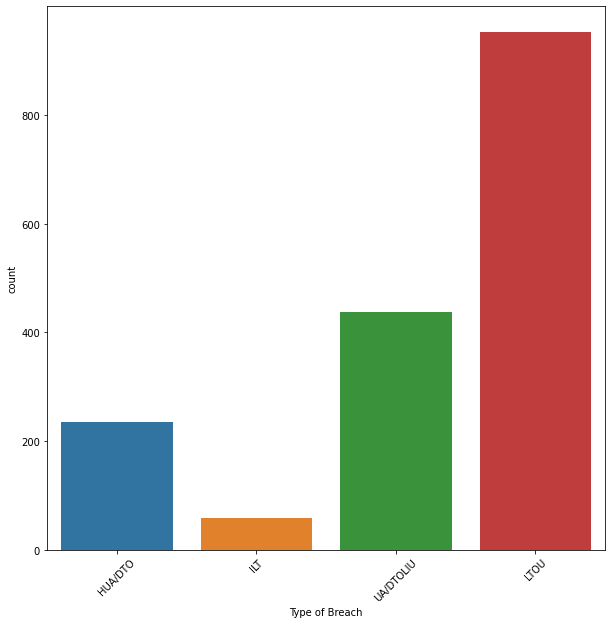

In [138]:
plt.figure(figsize=(10,10))
gph=sns.countplot(x=df["Type of Breach"],data=df)
plt.xticks(rotation=45)

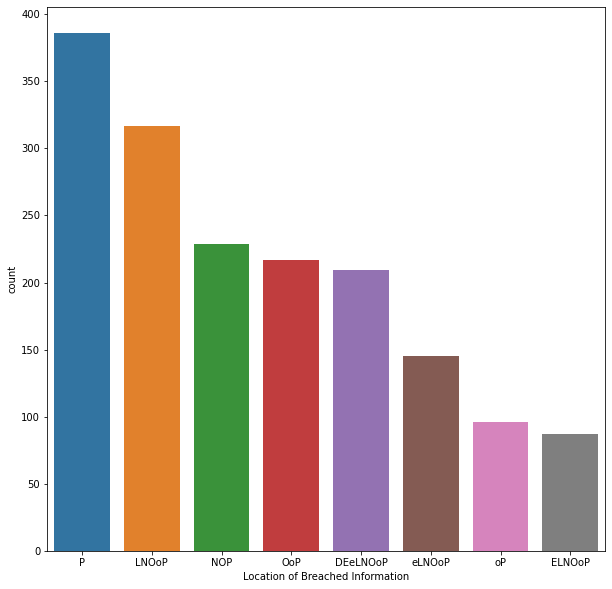

In [141]:
plt.figure(figsize=(10,10))
sns.countplot(x='Location of Breached Information',data=df, order=df['Location of Breached Information'].value_counts().index)

### Filling Missing Values in columns : 
##### Filling the missing values with the mode of that column:

In [33]:
df.isnull().sum()

Covered Entity Type                   42
2009                                1679
2010                                1500
2011                                1501
2012                                1490
2013                                1424
2014                                1404
2015                                1428
2016                                1458
Type of Breach                        14
Location of Breached Information      11
Business Associate Present             0
dtype: int64

In [34]:
m1 = df['Covered Entity Type'].mode()[0]
df['Covered Entity Type'].fillna(m1,inplace=True)

In [35]:
m2 = df['Type of Breach'].mode()[0]
df['Type of Breach'].fillna(m2,inplace=True)

In [36]:
m3 = df['Location of Breached Information'].mode()[0]
df['Location of Breached Information'].fillna(m3,inplace=True)

### One Hot Encoding
#####Since the dataset is of Categorical Data we have to encode them wit some numerical labels. To achieve this we can use:
#####   1. Dummy Variables
#####   2. One Hot Encoding
#####Here, we will follow One Hot Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
dfle = df
dfle['Covered Entity Type'] = le.fit_transform(dfle['Covered Entity Type'])
dfle['Type of Breach'] = le.fit_transform(dfle['Type of Breach'])
dfle['Location of Breached Information'] = le.fit_transform(dfle['Location of Breached Information'])
dfle['Business Associate Present'] = le.fit_transform(dfle['Business Associate Present'])
dfle

,Covered Entity Type,2009,2010,2011,2012,2013,2014,2015,2016,Type of Breach,Location of Breached Information,Business Associate Present
0,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,4,0
1,0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,4,1
2,3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,4,0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,4,0
4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2,5,0
1696,3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,5,0
1697,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,0
1698,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,0


In [39]:
dfle.drop([2009,2010,2011,2012,2013,2014,2015,2016],axis=1)

#Dropped these columns for ease of the model

,Covered Entity Type,Type of Breach,Location of Breached Information,Business Associate Present
0,3,0,4,0
1,0,0,4,1
2,3,0,4,0
3,1,0,4,0
4,3,0,4,0
...,...,...,...,...
1695,3,2,5,0
1696,3,2,5,0
1697,3,2,5,0
1698,3,2,5,0


In [40]:
X = dfle[['Covered Entity Type','Type of Breach','Location of Breached Information']].values
X

array([[3, 0, 4],
       [0, 0, 4],
       [3, 0, 4],
       ...,
       [3, 2, 5],
       [3, 2, 5],
       [3, 2, 5]])

In [41]:
y = dfle['Business Associate Present']
y

0       0
1       1
2       0
3       0
4       0
       ..
1695    0
1696    0
1697    0
1698    0
1699    0
Name: Business Associate Present, Length: 1697, dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

In [43]:
pd.set_option('display.max_rows', 10)

In [44]:
X=ohe.fit_transform(X).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [45]:
X.shape

(1697, 16)

In [46]:
x1 = X[:,1:4]
x2 = X[:,5:8]
x3 = X[:,9:]
X = np.concatenate((x1,x2,x3),axis=1)
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

### Preparing the Machine Learning Model

##### 60% of the datset is used in training the model and the rest in used in testing the model.

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=10)

In [270]:
y_test.value_counts()

0    550
1    129
Name: Business Associate Present, dtype: int64

##### Using Support Vector Machine

In [271]:
model = svm.SVC(kernel='rbf',C=1000)
model.fit(X_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [272]:
model.score(X_test, y_test)

0.9734904270986745

##### Prediction matrix: It is the collection of predicted values from test dataset.

In [273]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

#####Confusion Matrix: It is the performance matrix for the model.
It has True Positive, False Positive, True Negative, False Negative

In [274]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[546   4]
 [ 14 115]]


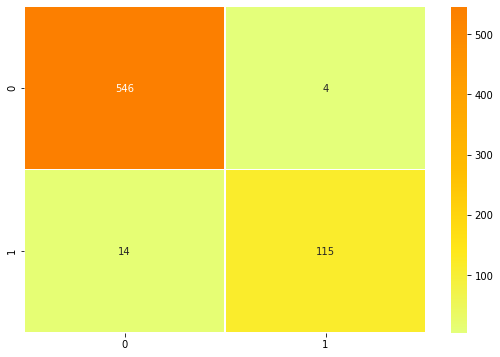

In [275]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm,annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Wistia')

##### Classification Report: It is the quality of the predictions of the model.

In [276]:
cr = classification_report(y_test,y_pred)
print (cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       550
           1       0.97      0.89      0.93       129

    accuracy                           0.97       679
   macro avg       0.97      0.94      0.96       679
weighted avg       0.97      0.97      0.97       679



###The model has an average accuracy of 98%.
### I have used SVM model for the project.
### Dataset split 60:40 for training and testing.

# Tried to use Naive Bayes algorithm.

In [227]:
m = GaussianNB()

In [228]:
m.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [152]:
m.score(X_test,y_test)

0.43004418262150224

In [154]:
y_pre = m.predict(X_test)
y_pre

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [158]:
c = confusion_matrix(y_test,y_pre)
c

array([[169, 381],
       [  6, 123]])

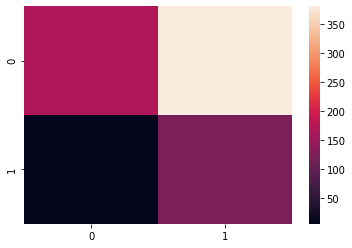

In [165]:
sns.heatmap(c)

In [168]:
c2 = classification_report(y_test,y_pre)
print(c2)

              precision    recall  f1-score   support

           0       0.97      0.31      0.47       550
           1       0.24      0.95      0.39       129

    accuracy                           0.43       679
   macro avg       0.60      0.63      0.43       679
weighted avg       0.83      0.43      0.45       679



# Target balancing using SMOTE and predicting using SVM algorithm

In [176]:
sm=SMOTE(random_state=10,ratio=1.0)

In [229]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [192]:
model.fit(X_train_res,y_train_res)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [232]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [234]:
unique_elements, counts_elements = np.unique(y_train_res, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [841 841]]


In [194]:
y_pred2 = model.predict(X_test)
y_pred2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [195]:
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[546,   4],
       [ 14, 115]])

In [200]:
cr2=classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       550
           1       0.97      0.89      0.93       129

    accuracy                           0.97       679
   macro avg       0.97      0.94      0.96       679
weighted avg       0.97      0.97      0.97       679



# HyperParameter Tunning using
1. GridSearchCV
2. RandomizedSearchCV

In [238]:
clf = GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1, 10, 1000],
    'kernel' : ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([0.01990938, 0.00332494, 0.01800551, 0.0037045 , 0.01798763,
        0.00414686]),
 'mean_score_time': array([0.00274997, 0.00084352, 0.00240436, 0.0008966 , 0.00228739,
        0.00097342]),
 'mean_test_score': array([0.9770085 , 0.97936665, 0.97936665, 0.97936665, 0.97936665,
        0.97936665]),
 'param_C': masked_array(data=[1, 1, 10, 10, 1000, 1000],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 1000, 'kernel': 'rbf'},
  {'C': 1000, 'kernel': 'linear'}],
 'rank_test_score': array([6, 1, 1, 1, 1, 1], dtype=int32),
 'split0_test_score': array([0.973529

In [240]:
d = pd.DataFrame(clf.cv_results_)
d[['param_C','param_kernel','mean_test_score','rank_test_score']]

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.977009,6
1,1,linear,0.979367,1
2,10,rbf,0.979367,1
3,10,linear,0.979367,1
4,1000,rbf,0.979367,1
5,1000,linear,0.979367,1


In [215]:
clf.best_score_

0.9793666493145932

In [216]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [243]:
m1 = svm.SVC(kernel='linear',C=1)
m1.fit(X_train_res,y_train_res)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [244]:
y_pred3=m1.predict(X_test)

In [245]:
cm3 = confusion_matrix(y_test,y_pred3)

In [255]:
cm3

array([[546,   4],
       [ 14, 115]])

In [257]:
cr3=classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       550
           1       0.97      0.89      0.93       129

    accuracy                           0.97       679
   macro avg       0.97      0.94      0.96       679
weighted avg       0.97      0.97      0.97       679



In [241]:
rs = RandomizedSearchCV(svm.SVC(gamma='auto'),{
    'C':[1, 10, 1000,20,45,864,645],
    'kernel' : ['rbf','linear']
}, cv=5, return_train_score=False, n_iter=4)
rs.fit(X,y)
rs.cv_results_
d2 = pd.DataFrame(rs.cv_results_)
d2[['param_C','param_kernel','mean_test_score','rank_test_score']]

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.977009,4
1,10,rbf,0.979367,1
2,20,rbf,0.979367,1
3,645,rbf,0.979367,1


In [236]:
rs.best_score_

0.9793666493145932

In [237]:
rs.best_params_

{'C': 864, 'kernel': 'rbf'}

In [248]:
m2 = svm.SVC(kernel='rbf',C=864)
m2.fit(X_train_res,y_train_res)

SVC(C=864, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [258]:
y_pred4 = m2.predict(X_test)

In [260]:
cm4=confusion_matrix(y_test,y_pred4)
print(cm4)

[[546   4]
 [ 14 115]]


In [261]:
cr4 = classification_report(y_test,y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       550
           1       0.97      0.89      0.93       129

    accuracy                           0.97       679
   macro avg       0.97      0.94      0.96       679
weighted avg       0.97      0.97      0.97       679

